1. Implement RNN, LSTM, GRU on mnist digit data.

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow import keras

In [144]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [187]:
xtrain.shape

(60000, 28, 28)

In [146]:
xtrain_scaled = normalize(xtrain)

In [147]:
xtest_scaled  = normalize(xtest)

In [148]:
ytrain_encode = to_categorical(ytrain)

In [149]:
ytest_encode  = to_categorical(ytest)

RNN model

In [152]:
model_rnn = Sequential()

In [153]:
model_rnn.add(keras.Input(shape=(28,28)))

In [154]:
model_rnn.add(SimpleRNN(64))

In [155]:
model_rnn.add(Dense(10, activation='softmax'))

In [156]:
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [157]:
history_rnn = model_rnn.fit(xtrain_scaled, ytrain_encode, epochs=3, validation_split=0.2, batch_size=128, verbose=2)

Epoch 1/3
375/375 - 7s - 19ms/step - accuracy: 0.7583 - loss: 0.8068 - val_accuracy: 0.8920 - val_loss: 0.3623
Epoch 2/3
375/375 - 3s - 9ms/step - accuracy: 0.9002 - loss: 0.3406 - val_accuracy: 0.9147 - val_loss: 0.2785
Epoch 3/3
375/375 - 4s - 11ms/step - accuracy: 0.9196 - loss: 0.2726 - val_accuracy: 0.9337 - val_loss: 0.2251


In [158]:
print(model_rnn.evaluate(xtest_scaled, ytest_encode, verbose=2))

313/313 - 1s - 3ms/step - accuracy: 0.9299 - loss: 0.2320
[0.23203225433826447, 0.9298999905586243]


In [160]:
pred1=model_rnn.predict(xtest_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [161]:
pred1[0]

array([1.43688817e-06, 1.82020143e-04, 1.16416035e-04, 2.01968313e-03,
       4.24474914e-04, 2.25214280e-05, 7.10367601e-07, 9.95700359e-01,
       3.75156924e-05, 1.49480661e-03], dtype=float32)

In [162]:
np.argmax(pred1[0])

np.int64(7)

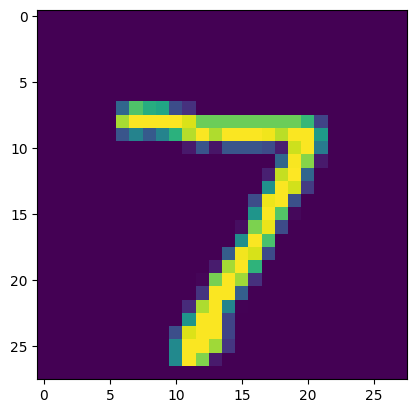

In [163]:
plt.imshow(xtest[0])

LSTM model

In [164]:
model_lstm = Sequential()

In [165]:
model_lstm.add(keras.Input(shape=(28,28)))

In [166]:
model_lstm.add(LSTM(64))

In [167]:
model_lstm.add(Dense(10, activation='softmax'))

In [168]:
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [169]:
history_lstm = model_lstm.fit(xtrain_scaled, ytrain_encode, epochs=3, validation_split=0.2, batch_size=128, verbose=2)

Epoch 1/3
375/375 - 16s - 43ms/step - accuracy: 0.6778 - loss: 0.9633 - val_accuracy: 0.8660 - val_loss: 0.4381
Epoch 2/3
375/375 - 13s - 34ms/step - accuracy: 0.8936 - loss: 0.3522 - val_accuracy: 0.9203 - val_loss: 0.2526
Epoch 3/3
375/375 - 14s - 36ms/step - accuracy: 0.9264 - loss: 0.2415 - val_accuracy: 0.9341 - val_loss: 0.2195


In [170]:
import pandas as pd

In [172]:
his2=pd.DataFrame(history_lstm.history)

In [173]:
his2

,accuracy,loss,val_accuracy,val_loss
0,0.677813,0.963314,0.866000,0.438129
1,0.893604,0.352160,0.920333,0.252579
2,0.926417,0.241511,0.934083,0.219523


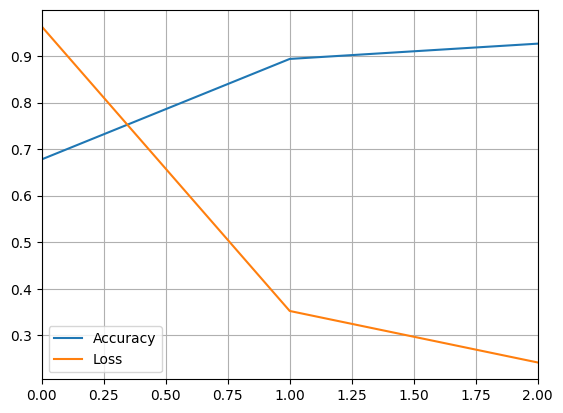

In [174]:
plt.plot(his2['accuracy'],label='Accuracy')
plt.plot(his2['loss'],label='Loss')
plt.xlim(0,2)
plt.legend()
plt.grid(True)

GRU model

In [175]:
model_gru = Sequential()

In [176]:
model_gru.add(keras.Input(shape=(28,28)))

In [177]:
model_gru.add(GRU(64))

In [178]:
model_gru.add(Dense(10, activation='softmax'))

In [179]:
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [180]:
history_gru = model_gru.fit(xtrain_scaled, ytrain_encode, epochs=5, validation_split=0.2, batch_size=128, verbose=2)

Epoch 1/5
375/375 - 19s - 51ms/step - accuracy: 0.5766 - loss: 1.2284 - val_accuracy: 0.8357 - val_loss: 0.5460
Epoch 2/5
375/375 - 15s - 39ms/step - accuracy: 0.8681 - loss: 0.4351 - val_accuracy: 0.9086 - val_loss: 0.2931
Epoch 3/5
375/375 - 20s - 54ms/step - accuracy: 0.9190 - loss: 0.2684 - val_accuracy: 0.9350 - val_loss: 0.2192
Epoch 4/5
375/375 - 18s - 47ms/step - accuracy: 0.9376 - loss: 0.2092 - val_accuracy: 0.9499 - val_loss: 0.1651
Epoch 5/5
375/375 - 16s - 44ms/step - accuracy: 0.9488 - loss: 0.1724 - val_accuracy: 0.9518 - val_loss: 0.1621


In [181]:
print(model_gru.evaluate(xtest_scaled, ytest_encode, verbose=2))

313/313 - 2s - 8ms/step - accuracy: 0.9465 - loss: 0.1752
[0.17521145939826965, 0.9465000033378601]


In [182]:
his3=pd.DataFrame(history_gru.history)

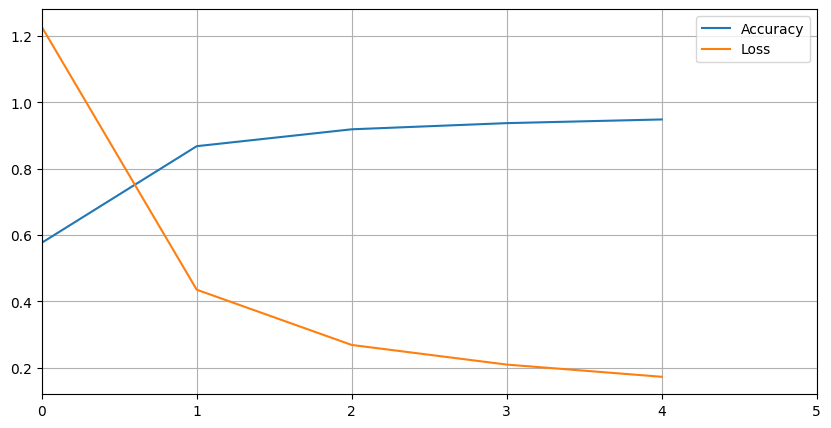

In [183]:
plt.figure(figsize=(10,5))
plt.plot(his3['accuracy'],label='Accuracy')
plt.plot(his3['loss'],label='Loss')
plt.xlim(0,5)
plt.legend()
plt.grid(True)

2. Implement RNN, LSTM, GRU on CIFAR-100 data.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Flatten
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow import keras

In [4]:
(xtrain_c100, ytrain_c100), (xtest_c100, ytest_c100) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
xtrain_c100.shape

(50000, 32, 32, 3)

In [6]:
xtrain_gray = np.dot(xtrain_c100[...,:3], [0.2989, 0.5870, 0.1140])

In [7]:
xtest_gray  = np.dot(xtest_c100[...,:3],  [0.2989, 0.5870, 0.1140])

In [8]:
xtrain_scaled = normalize(xtrain_gray)

In [9]:
xtest_scaled  = normalize(xtest_gray)

In [10]:
ytrain_enc = to_categorical(ytrain_c100, num_classes=100)

RNN model

In [12]:
model_rnn_c100 = Sequential()

In [13]:
model_rnn_c100.add(keras.Input(shape=(32,32)))

In [14]:
model_rnn_c100.add(SimpleRNN(128))

In [15]:
model_rnn_c100.add(Dense(100, activation='softmax'))

In [16]:
model_rnn_c100.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history_rnn_c100 = model_rnn_c100.fit(xtrain_scaled, ytrain_enc, epochs=5, validation_split=0.2, batch_size=256, verbose=2)

Epoch 1/5
157/157 - 12s - 76ms/step - accuracy: 0.0298 - loss: 4.5032 - val_accuracy: 0.0431 - val_loss: 4.4313
Epoch 2/5
157/157 - 8s - 50ms/step - accuracy: 0.0487 - loss: 4.4016 - val_accuracy: 0.0558 - val_loss: 4.3762
Epoch 3/5
157/157 - 9s - 57ms/step - accuracy: 0.0562 - loss: 4.3518 - val_accuracy: 0.0544 - val_loss: 4.3581
Epoch 4/5
157/157 - 9s - 57ms/step - accuracy: 0.0632 - loss: 4.3105 - val_accuracy: 0.0642 - val_loss: 4.3046
Epoch 5/5
157/157 - 7s - 46ms/step - accuracy: 0.0676 - loss: 4.2779 - val_accuracy: 0.0674 - val_loss: 4.2856


In [18]:
print(model_rnn_c100.evaluate(xtest_scaled, ytest_enc, verbose=2))

313/313 - 1s - 5ms/step - accuracy: 0.0632 - loss: 4.2921
[4.2921295166015625, 0.06319999694824219]


In [19]:
his3=pd.DataFrame(history_rnn_c100.history)

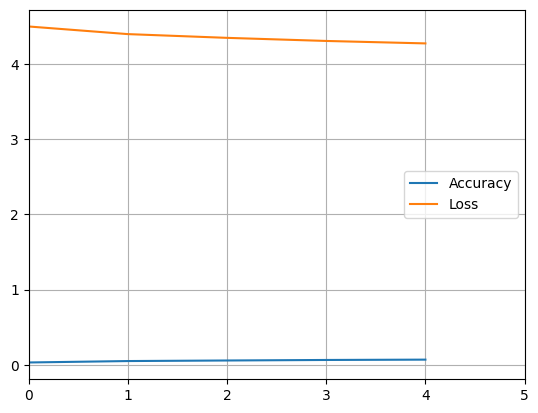

In [20]:
plt.plot(his3['accuracy'],label='Accuracy')
plt.plot(his3['loss'],label='Loss')
plt.xlim(0,5)
plt.legend()
plt.grid(True)

LSTM model

In [21]:
model_lstm_c100 = Sequential()

In [22]:
model_lstm_c100.add(keras.Input(shape=(32,32)))

In [23]:
model_lstm_c100.add(LSTM(128))

In [24]:
model_lstm_c100.add(Dense(100, activation='softmax'))

In [25]:
model_lstm_c100.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history_lstm_c100 = model_lstm_c100.fit(xtrain_scaled, ytrain_enc, epochs=5, validation_split=0.2, batch_size=256, verbose=2)

Epoch 1/5
157/157 - 30s - 191ms/step - accuracy: 0.0210 - loss: 4.5294 - val_accuracy: 0.0296 - val_loss: 4.4562
Epoch 2/5
157/157 - 40s - 252ms/step - accuracy: 0.0396 - loss: 4.4074 - val_accuracy: 0.0460 - val_loss: 4.3820
Epoch 3/5
157/157 - 30s - 193ms/step - accuracy: 0.0537 - loss: 4.3325 - val_accuracy: 0.0528 - val_loss: 4.3257
Epoch 4/5
157/157 - 36s - 230ms/step - accuracy: 0.0617 - loss: 4.2757 - val_accuracy: 0.0635 - val_loss: 4.2799
Epoch 5/5
157/157 - 26s - 165ms/step - accuracy: 0.0707 - loss: 4.2230 - val_accuracy: 0.0682 - val_loss: 4.2444


In [27]:
print(model_lstm_c100.evaluate(xtest_scaled, ytest_enc, verbose=2))

313/313 - 5s - 14ms/step - accuracy: 0.0702 - loss: 4.2425
[4.242516994476318, 0.07020000368356705]


In [28]:
his3=pd.DataFrame(history_lstm_c100.history)

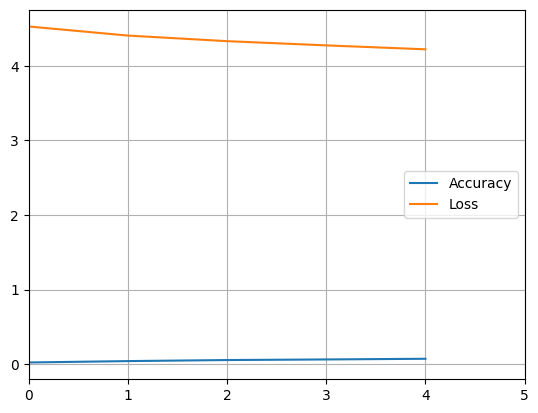

In [29]:
plt.plot(his3['accuracy'],label='Accuracy')
plt.plot(his3['loss'],label='Loss')
plt.xlim(0,5)
plt.legend()
plt.grid(True)

GRU model

In [30]:
model_gru_c100 = Sequential()

In [31]:
model_gru_c100.add(keras.Input(shape=(32,32)))

In [32]:
model_gru_c100.add(GRU(128))

In [33]:
model_gru_c100.add(Dense(100, activation='softmax'))

In [34]:
model_gru_c100.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history_gru_c100 = model_gru_c100.fit(xtrain_scaled, ytrain_enc, epochs=5, validation_split=0.2, batch_size=256, verbose=2)

Epoch 1/5
157/157 - 34s - 215ms/step - accuracy: 0.0169 - loss: 4.5583 - val_accuracy: 0.0237 - val_loss: 4.4934
Epoch 2/5
157/157 - 42s - 265ms/step - accuracy: 0.0357 - loss: 4.4383 - val_accuracy: 0.0408 - val_loss: 4.4004
Epoch 3/5
157/157 - 28s - 179ms/step - accuracy: 0.0479 - loss: 4.3638 - val_accuracy: 0.0495 - val_loss: 4.3545
Epoch 4/5
157/157 - 28s - 181ms/step - accuracy: 0.0542 - loss: 4.3210 - val_accuracy: 0.0557 - val_loss: 4.3177
Epoch 5/5
157/157 - 41s - 260ms/step - accuracy: 0.0595 - loss: 4.2801 - val_accuracy: 0.0631 - val_loss: 4.2787


In [36]:
print(model_gru_c100.evaluate(xtest_scaled, ytest_enc, verbose=2))

313/313 - 4s - 11ms/step - accuracy: 0.0620 - loss: 4.2847
[4.28471565246582, 0.06199999898672104]


In [37]:
his3=pd.DataFrame(history_gru_c100.history)

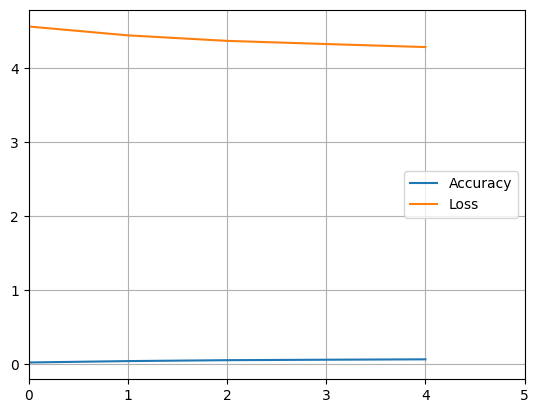

In [38]:
plt.plot(his3['accuracy'],label='Accuracy')
plt.plot(his3['loss'],label='Loss')
plt.xlim(0,5)
plt.legend()
plt.grid(True)

4. Implement object detection using YOLO with any image.

In [39]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.8 MB/s eta 0:00:00


In [63]:
from ultralytics import YOLO
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import numpy as np

In [64]:
!yolo predict model=yolov8n.pt source='Kitten.jpg'

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 985, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/model.py", line 540, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/predictor.py", line 244, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
             ^^^
  File "/usr/local/lib/python3.

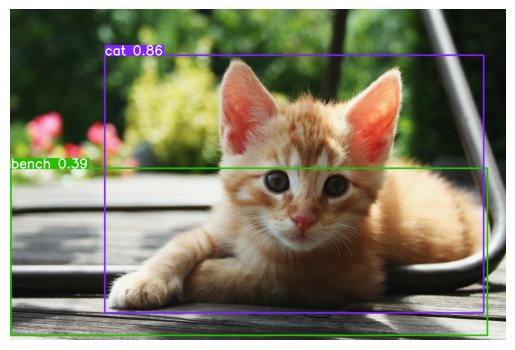

In [65]:
from tensorflow.keras.preprocessing.image import load_img
output_img = load_img('runs/detect/predict/Kitten.jpg')
plt.imshow(output_img)
plt.axis('off')
plt.show()